In [1]:
''' Create own Dataframe using pandas' constructor. 
Dataframe have column like row_no, player_id, player_name, match_id, run, total_run(in that particular match).'''

import random
import string
import pandas as pd

data = {
    'player_id':[],
    'player_name':[],
    'total_match':[],
    'total_run': [],
}
total_player = 1000
max_match = 500
for i in range(total_player):
    data['player_id'].append(i+1)
    data['player_name'].append(''.join(random.choices(string.ascii_uppercase, k=6)))
    t_match = random.randint(0,max_match)
    data['total_match'].append(t_match)
    if random.randint(0,3):
        data['total_run'].append(random.randint(t_match,2*t_match))
    else:
        data['total_run'].append(random.randint(0,4*t_match))
        
df = pd.DataFrame(data)
df.head()

,player_id,player_name,total_match,total_run
0,1,JNMFZA,459,1788
1,2,FQWZHD,166,263
2,3,LTPWAJ,473,582
3,4,VYKXQS,494,860
4,5,APSAAH,408,451


In [2]:
# Print a chosen record (row) or a chosen column (data field). 

print('Printing row no 2')
print(df[2:3])
print('\nPrinting column `Player Name`')
print(df['player_name'])

Printing row no 2
   player_id player_name  total_match  total_run
2          3      LTPWAJ          473        582

Printing column `Player Name`
0      JNMFZA
1      FQWZHD
2      LTPWAJ
3      VYKXQS
4      APSAAH
        ...  
995    QJQTUX
996    GSJRMA
997    QAUQGL
998    ZHDOJN
999    AYDPIV
Name: player_name, Length: 1000, dtype: object


In [3]:
# Print rows that satisfy a condition on one of the column entries and  then sort by run
match = 250
d = df[(df['total_match']>=match)].sort_values(by=['total_run'])
print('\nPrint rows that satisfy a condition on one of the column entries and  then sort by run:')
d.head()
print(d)


Print rows that satisfy a condition on one of the column entries and  then sort by run:
     player_id player_name  total_match  total_run
763        764      QFWPXF          416          0
683        684      IZOGYL          260          5
11          12      ZAKWFM          413         20
110        111      LPULBR          332         25
60          61      ZBPMQI          408         68
..         ...         ...          ...        ...
789        790      LPHPNS          471       1671
479        480      KYWQJA          437       1707
837        838      RRTIFS          458       1737
923        924      KUFMBK          476       1783
0            1      JNMFZA          459       1788

[522 rows x 4 columns]


In [4]:
# compute the percentage toal match scored by the player with respect to the total run played by him

def percentage(x,y):
    if y==0:
        return 'None'
    return "{:.2f}".format((x/y)*100)

df['percentage'] = df.apply(lambda x: percentage(x['total_match'],x['total_run']),axis=1)
df.head()

,player_id,player_name,total_match,total_run,percentage
0,1,JNMFZA,459,1788,25.67
1,2,FQWZHD,166,263,63.12
2,3,LTPWAJ,473,582,81.27
3,4,VYKXQS,494,860,57.44
4,5,APSAAH,408,451,90.47


In [5]:
# Add a new column to the Dataframe. For example, you may want to add the number written on the player's jersey. 
jersey = {}
for i in range(total_player):
    jersey[i+1] = random.choice(['R','B','G','Y','V'])
    
df['jersey'] = df['player_id'].map(jersey)
print('\nadding new colum jersey to each player.')
df.head()


adding new colum jersey to each player.


,player_id,player_name,total_match,total_run,percentage,jersey
0,1,JNMFZA,459,1788,25.67,G
1,2,FQWZHD,166,263,63.12,B
2,3,LTPWAJ,473,582,81.27,G
3,4,VYKXQS,494,860,57.44,B
4,5,APSAAH,408,451,90.47,R


In [6]:
# Export the Dataframe to a file in pickle format and save it as a file

df.to_pickle('./data.fkl')

In [7]:
# Read the pickle file back to the program.

data_set = pd.read_pickle('./data.fkl')
data_set.head()

,player_id,player_name,total_match,total_run,percentage,jersey
0,1,JNMFZA,459,1788,25.67,G
1,2,FQWZHD,166,263,63.12,B
2,3,LTPWAJ,473,582,81.27,G
3,4,VYKXQS,494,860,57.44,B
4,5,APSAAH,408,451,90.47,R


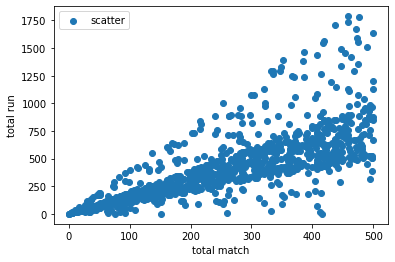

In [8]:
'''Use matplotlib library to make a scatter plot of columns that contain numeric
data. Provide labels to the axes. '''

import matplotlib.pyplot as plt
import numpy as np

X= data_set['total_match'].values
Y = data_set['total_run'].values

mean_x = np.mean(X)
mean_y = np.mean(Y)

n = len(X)

plt.scatter(X,Y,label='scatter')
plt.xlabel('total match')
plt.ylabel('total run')
plt.legend()
plt.show()

In [9]:
''' Implement linear regression to model the dependency between two variables - the predictor total run and target run'''
# LINEAR REGRESSION USING THE FORMULA

'''
using formulla for cal w0 and w1 obtained by minizing the  ERM by differnciating with respect to w0 and w1 respectively
m = ((x-mean_x)*(y-mean_y)) / ((x-mean_x)^2)
c = mean_y - m*mean_x
'''
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i]- mean_x) **2

w1  = numer/denom
w0  = mean_y - (w1*mean_x)

# print coefficient
print('Coefficients are: ',w0,w1)

Coefficients are:  -1.2902072472050463 1.6545153179660361


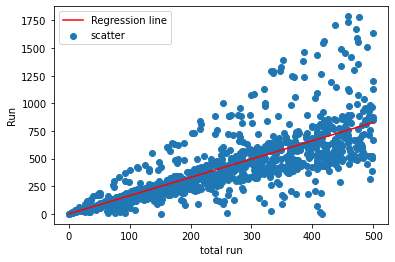

In [10]:
# Plot the linear regression line
max_x = np.max(X)
min_x = np.min(X)

x = np.linspace(min_x,max_x)
y = w0 + w1*x

# ploting scatter line
plt.scatter(X,Y, label='scatter')

# ploting regression line
plt.plot(x,y,color='red', label='Regression line')


plt.xlabel('total run')
plt.ylabel('Run')
plt.legend()
plt.show()

In [11]:
# R^2 method to check correctness
'''
r^2 = ((Yp - mean_y)^2) / ((Y - mean_y)^2)
'''
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = w0 + w1 * X[i]
    ss_t += (Y[i] - mean_y) **2
    ss_r += (Y[i] - y_pred) **2
r2 = 1 - (ss_r/ss_t)
print('scores are ',r2)

scores are  0.570774279913185


In [12]:
# LINEAR REGRESSION USING THE INVERSE METHOD
'''
using formulla for cal w0 and w1 obtained by minizing the  ERM by differnciating with respect to w0 and w1 respectively
m = ((x-mean_x)*(y-mean_y)) / ((x-mean_x)^2)
c = mean_y - m*mean_x
'''
import numpy as np
X_reshape = X.reshape((n,1))
x_reshape =np.append(X_reshape, [[1] for _ in range(len(X))],axis=1)


# finding coefficients (Implement (X * Xt)^-1.Xt.Y)
x_transpose = np.transpose(x_reshape)
x_transpose_x = np.matmul(x_transpose,x_reshape)
x_transpose_inverse = np.linalg.inv(x_transpose_x)
x_transpose_inverse_transpose = np.dot(x_transpose_inverse,x_transpose)
coeff = np.dot(x_transpose_inverse_transpose,Y)
w1,w0 = coeff[0], coeff[1]
print('Coefficients are: ',coeff)

Coefficients are:  [ 1.65451532 -1.29020725]


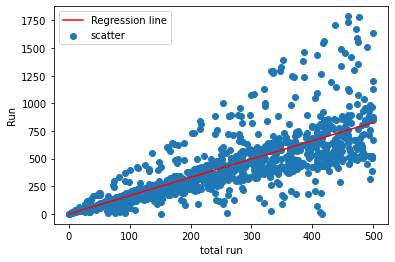

In [13]:
# Plot the linear regression line
max_x = np.max(X)
min_x = np.min(X)

x = np.linspace(min_x,max_x)
y = w0 + w1*x

# ploting scatter line
plt.scatter(X,Y, label='scatter')

# ploting regression line
plt.plot(x,y,color='red', label='Regression line')


plt.xlabel('total run')
plt.ylabel('Run')
plt.legend()
plt.show()

In [14]:
# LINEAR REGRESSION USING THE SKLEARN

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape((n,1))

# create model
reg = LinearRegression()

# fitting training data
reg = reg.fit(X,Y)

# Y prediction
y_pred = reg.predict(X)

# cal R2 error
r2_score = reg.score(X,Y)

print('coefficients are: ', reg.coef_)
print('scores are ',r2_score)

coefficients are:  [1.65451532]
scores are  0.5707742799131845
